# Описание проекта

Нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В нашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

1. [Подготовка данных](#Подготовка-данных)
2. [Анализ данных](#Анализ-данных)
3. [Модель](#Модель)
4. [Выводы](#Выводы)

# Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

Посмотрим на наши данные.

In [2]:
gold_recovery_train = pd.read_csv('gold_recovery_train.csv')

In [3]:
gold_recovery_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_recovery_test = pd.read_csv('gold_recovery_test.csv')

In [5]:
gold_recovery_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
gold_recovery_full = pd.read_csv('gold_recovery_full.csv')

In [7]:
gold_recovery_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Перед нами три датасета, один из которых полный, а два других это обучающая и тестовая выборки, взятые из полного датасета. Каждая из таблиц содержит определённые признаки, складывающиеся из этапов, параметров этапов, типов параметров.


**Технологический процесс:**
* Rougher feed — исходное сырье;
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant;
    * Xanthate — ксантогенат (промотер, или активатор флотации);
    * Sulphate — сульфат (на данном производстве сульфид натрия);
    * Depressant — депрессант (силикат натрия);
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты;
* Float banks — флотационная установка;
* Cleaner process — очистка;
* Rougher Au — черновой концентрат золота;
* Final Au — финальный концентрат золота.

**Параметры этапов:**
* air amount — объём воздуха;
* fluid levels — уровень жидкости;
* feed size — размер гранул сырья;
* feed rate — скорость подачи.

**Этап:**
* rougher — флотация;
* primary_cleaner — первичная очистка;
* secondary_cleaner — вторичная очистка;
* final — финальные характеристики.

**Тип_параметра:**
* input — параметры сырья;
* output — параметры продукта;
* state — параметры, характеризующие текущее состояние этапа;
* calculation — расчётные характеристики.

Все признаки не вмещаются в таблицу, выведем их отдельно.

In [8]:
gold_recovery_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [9]:
gold_recovery_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

Как мы видим, на тестовой выборке признаков меньше, чем на обучающей.

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака *rougher.output.recovery*. Для начала проверим датасет на пропуски.

In [10]:
gold_recovery_train.isnull().sum().sort_values(ascending=True)

date                                                     0
primary_cleaner.input.feed_size                          0
rougher.calculation.floatbank11_sulfate_to_au_feed      27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.sulfate_to_au_concentrate           27
                                                      ... 
secondary_cleaner.output.tail_sol                     1986
rougher.output.tail_au                                2249
rougher.output.tail_sol                               2249
rougher.output.tail_ag                                2250
rougher.output.recovery                               2573
Length: 87, dtype: int64

Достаточно много пропусков, особенно на этапе флотации. Удалим все строки с пропусками.

In [11]:
gold_recovery_train.dropna(inplace=True)

Теперь проверим на пропуски.

In [12]:
gold_recovery_train.duplicated().sum()

0

Теперь мы сможем посчитать эффективность обогащения. Для удобства запишем в константы нужные нам признаки:
* C - *rougher.output.concentrate_au* - доля золота в концентрате после флотации;
* А - *rougher.input.feed_au* - доля золота в сырье до флотации;
* T - *rougher.output.tail_au* - доля золота в отвальных хвостах после флотации.

In [13]:
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

In [14]:
gold_recovery_train['recovery'] = ((C*(F-T))/(F*(C-T)))*100

Теперь сравним полученное значение с ранее определённым.

In [15]:
gold_recovery_train['recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: recovery, Length: 11017, dtype: float64

In [16]:
gold_recovery_train['rougher.output.recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 11017, dtype: float64

На первый взгляд, результаты одинаковые. Посчитаем среднюю абсолютную ошибку.

In [17]:
mean_absolute_error(gold_recovery_train['recovery'], gold_recovery_train['rougher.output.recovery'])

9.555596961987514e-15

Средняя абсолютная ошибка близка к 0, а это значит, что если и есть расхождения в показателях, то незначительные.

Посмотрм на признаки, недоступные в тестовой выборке.

In [18]:
grtest = pd.DataFrame(gold_recovery_test.columns)
grtest.columns = ['name']
grtrain = pd.DataFrame(gold_recovery_train.columns)
grtrain.columns = ['name']

In [19]:
col = grtrain.query('name not in @grtest.name')
col

,name
1,final.output.concentrate_ag
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.concentrate_au
5,final.output.recovery
6,final.output.tail_ag
7,final.output.tail_pb
8,final.output.tail_sol
9,final.output.tail_au
14,primary_cleaner.output.concentrate_ag


В тестовой выборке отсутствует около тридцати признаков. Почти все они относятся к параметрам продукта, полученным после каждой стадии обработки смеси: после флотации (*rougher.output*), после первой очистки (*primary_cleaner.output*), после второго этапа очистки (*secondary_cleaner.output*) и финальный концентрат (*final.output*). Также в тестовой выборке отсутствуют значения эффективности обогащения (*recovery*).

Теперь подготовим остальные данные, проверим на пропуски и избавимся от них на тестовой выборке.

In [20]:
gold_recovery_test.isnull().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_f_air                17
primary_cleaner.state.floatbank8_a_air         16


In [21]:
gold_recovery_test.dropna(inplace=True)

Затем проверим на дубликаты объектов.

In [22]:
gold_recovery_test.duplicated().sum()

0

Дубликатов не найдено, от пропусков мы избавились, а значит и тестовая выборка готова для дальнейшей работы.

Поработаем с пропусками на общей выборке.

In [23]:
gold_recovery_full.isnull().sum().sort_values(ascending=False)

rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_sol                     2736
rougher.output.tail_au                      2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date                                           0
Length: 87, dtype: int64

In [24]:
gold_recovery_full.dropna(inplace=True)

Сравним размер тестовой и обучающей с размером полноый выборки после удаления пустых значений.

In [25]:
gold_recovery_test.shape[0] + gold_recovery_train.shape[0]

16400

In [26]:
gold_recovery_full.shape

(16094, 87)

Почему-то в общем файле после обработкт пропусков объектов осталось меньше на 306, чем в объединённой обучающей и тестовой выборках.

## Вывод

* Мы посмотрели на наши данные и вручную подсчитали эффективность обогащения после флотации. Выяснили, что различия между нашим посчитанным и табличными данными есть, но они не значительны. Об этом нам говорит средняя абсолютная ошибка, близкая к 0.
* Мы выяснили, что количество признаков обучающей и тестовой выборок отличается. В тестовой выборке отсутствуют параметры продукта, полученные после каждой стадии обработки смеси: флотации и двух обработок. Также отсутствует концентрация веществ и значения эффективности обогащения *recovery*. Все эти показатели характеризуют качество обработки нашей смеси на пути к золоту.
* Мы прдобработали данные: избавились от пропусков в данных, которые мешают вычислениям, и проверили данные на дубликаты.

# Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Для начала для удобства выберем из признаков те, которые относятся к конкретным металлам.

In [27]:
grtrain[grtrain['name'].str.contains('au')]

,name
4,final.output.concentrate_au
9,final.output.tail_au
17,primary_cleaner.output.concentrate_au
21,primary_cleaner.output.tail_au
30,rougher.calculation.sulfate_to_au_concentrate
31,rougher.calculation.floatbank10_sulfate_to_au_...
32,rougher.calculation.floatbank11_sulfate_to_au_...
33,rougher.calculation.au_pb_ratio
39,rougher.input.feed_au
47,rougher.output.concentrate_au


In [28]:
grtrain[grtrain['name'].str.contains('ag')]

,name
1,final.output.concentrate_ag
6,final.output.tail_ag
14,primary_cleaner.output.concentrate_ag
18,primary_cleaner.output.tail_ag
34,rougher.input.feed_ag
44,rougher.output.concentrate_ag
49,rougher.output.tail_ag
65,secondary_cleaner.output.tail_ag


In [29]:
grtrain[grtrain['name'].str.contains('pb')]

,name
2,final.output.concentrate_pb
7,final.output.tail_pb
15,primary_cleaner.output.concentrate_pb
19,primary_cleaner.output.tail_pb
33,rougher.calculation.au_pb_ratio
35,rougher.input.feed_pb
45,rougher.output.concentrate_pb
50,rougher.output.tail_pb
66,secondary_cleaner.output.tail_pb


Затем построим гистограммы распределения средних концетраций металлов на разных этапах обработки и сравним значения.

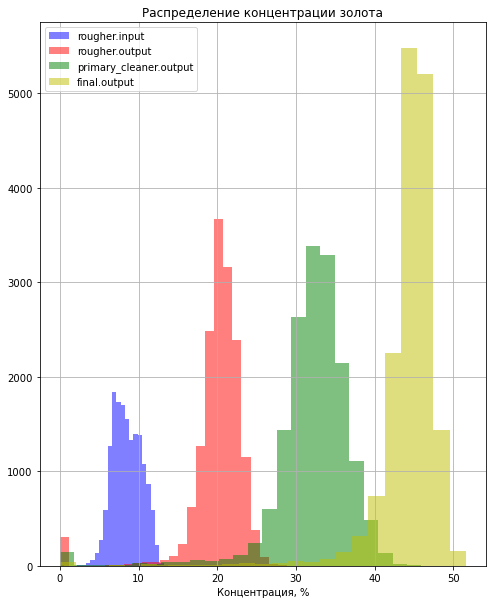

In [30]:
plt.figure(figsize=(8,10))
plt.hist(gold_recovery_full['rougher.input.feed_au'], bins=25, alpha=0.5, label='rougher.input', color='b')
plt.hist(gold_recovery_full['rougher.output.concentrate_au'], bins=25, alpha=0.5, label='rougher.output', color='r')
plt.hist(gold_recovery_full['primary_cleaner.output.concentrate_au'], bins=25, alpha=0.5, label='primary_cleaner.output', color='g')
plt.hist(gold_recovery_full['final.output.concentrate_au'], bins=25, alpha=0.5, label='final.output', color='y')
plt.legend(loc='upper left')
plt.xlabel('Концентрация, %')
plt.grid()
plt.title('Распределение концентрации золота');

Мы видим, что после флотации концентрация золота увеличилась более чем в два раза, до 20%. После первичной обработки, концентрация выросла ещё, в среднем в 1,5 раза, доля большинства объектов превысила 30%. Финальная концентрация золота в смеси достигла 42-46% в среднем.

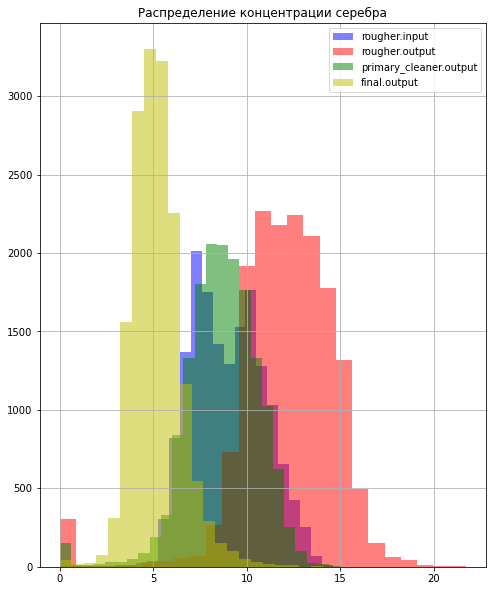

In [31]:
plt.figure(figsize=(8,10))
plt.hist(gold_recovery_full['rougher.input.feed_ag'], bins=25, alpha=0.5, label='rougher.input', color='b')
plt.hist(gold_recovery_full['rougher.output.concentrate_ag'], bins=25, alpha=0.5, label='rougher.output', color='r')
plt.hist(gold_recovery_full['primary_cleaner.output.concentrate_ag'], bins=25, alpha=0.5, label='primary_cleaner.output', color='g')
plt.hist(gold_recovery_full['final.output.concentrate_ag'], bins=25, alpha=0.5, label='final.output', color='y')
plt.legend(loc='upper right')
plt.grid()
plt.title('Распределение концентрации серебра');

После флотации концентрация серебра также увеличилась, но не сильно. Однако до флотации у серебра было два пика на 7% и 10% более чем в два раза, а после флотации концентрация большинства элементов достигает 11-13%. После первичной и вторичной обработок концентрация серебра падает до 5%.

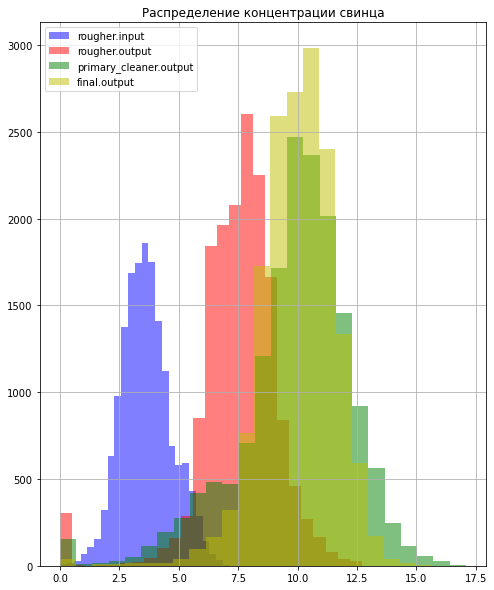

In [32]:
plt.figure(figsize=(8,10))
plt.hist(gold_recovery_full['rougher.input.feed_pb'], bins=25, alpha=0.5, label='rougher.input', color='b')
plt.hist(gold_recovery_full['rougher.output.concentrate_pb'], bins=25, alpha=0.5, label='rougher.output', color='r')
plt.hist(gold_recovery_full['primary_cleaner.output.concentrate_pb'], bins=25, alpha=0.5, label='primary_cleaner.output', color='g')
plt.hist(gold_recovery_full['final.output.concentrate_pb'], bins=25, alpha=0.5, label='final.output', color='y')
plt.legend(loc='upper left')
plt.grid()
plt.title('Распределение концентрации свинца');

После флотации концентрация свинца увеличилась почти в два раза, до 7.5%. После первичной обработки концентрация свинца, также как и золота, увеличилась, но незначительно, до 10%. После вторичной очистки финальный концентрат содержит, на несколько десятых процента свинца больше. Интересно, что доля серебра упала, а доля свинца выросла.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

Выведем средние значения размеров сырья на обеих выборках.

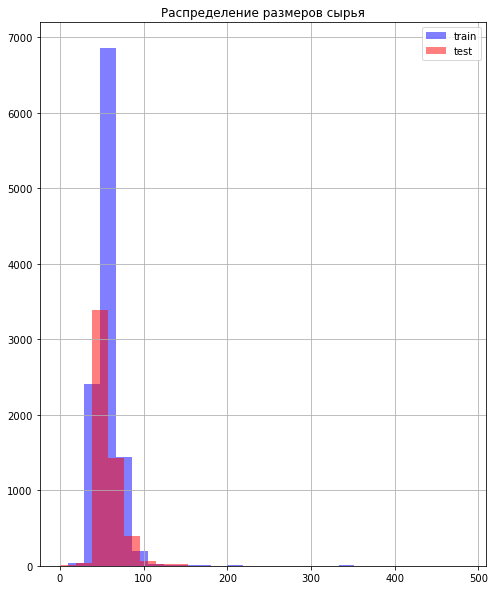

In [33]:
plt.figure(figsize=(8,10))
plt.hist(gold_recovery_train['rougher.input.feed_size'], bins=25, alpha=0.5, label='train', color='b')
plt.hist(gold_recovery_test['rougher.input.feed_size'], bins=25, alpha=0.5, label='test', color='r')
plt.legend(loc='upper right')
plt.grid()
plt.title('Распределение размеров сырья');

Мы видим, что средние значения размеров сырья на обучающей и тестовой выборках достаточно сильно различаются. Больше всего гранул на обучающей выборке имеет размер 50-60, их почти 7 тысяч, а на тестовой больше всего гранул размером 40-50 - почти 3.5 тысячи. Этот фактор может повлиять на дальнейшую нашу модель.

Исследуем суммарную концентрацию всех веществ на разных стадиях. Для начала выберем все признаки с концентрацией веществ.

In [34]:
grtrain[grtrain['name'].str.contains('concentrate')]

,name
1,final.output.concentrate_ag
2,final.output.concentrate_pb
3,final.output.concentrate_sol
4,final.output.concentrate_au
14,primary_cleaner.output.concentrate_ag
15,primary_cleaner.output.concentrate_pb
16,primary_cleaner.output.concentrate_sol
17,primary_cleaner.output.concentrate_au
30,rougher.calculation.sulfate_to_au_concentrate
44,rougher.output.concentrate_ag


Посмотрим на суммарную концентрацию основных веществ (золото, серебро, свинец и соли) на разных стадиях обработки золотоносной смеси.

In [35]:
concentrate_sum = pd.DataFrame({'rougher.output': [(gold_recovery_full['rougher.output.concentrate_au'] + 
                                                    gold_recovery_full['rougher.output.concentrate_ag'] + 
                                                    gold_recovery_full['rougher.output.concentrate_pb'] + 
                                                    gold_recovery_full['rougher.output.concentrate_sol']).mean()],
                                'primary_cleaner': [(gold_recovery_full['primary_cleaner.output.concentrate_au'] + 
                                                     gold_recovery_full['primary_cleaner.output.concentrate_ag'] + 
                                                     gold_recovery_full['primary_cleaner.output.concentrate_pb'] + 
                                                     gold_recovery_full['primary_cleaner.output.concentrate_sol']).mean()],
                                'final.output': [(gold_recovery_full['final.output.concentrate_au'] + 
                                                  gold_recovery_full['final.output.concentrate_ag'] + 
                                                  gold_recovery_full['final.output.concentrate_pb'] + 
                                                  gold_recovery_full['final.output.concentrate_sol']).mean()]
                                })
concentrate_sum

,rougher.output,primary_cleaner,final.output
0,68.805821,61.372275,69.367841


Мы видим, что после флотации суммарная концетрация веществ в смеси равна 69%, после первичной очистки, концентрация заметно падает до 61%, а после вторичной очистки снова достигает 69%.

Кажется, такое распределение не нормально. Возможно в признаках концентрации веществ после первичной обработки содержится много мелких значений, которые и понижают общий процент. Выведем "ящики с усами" и посмотрим на распределение значений.

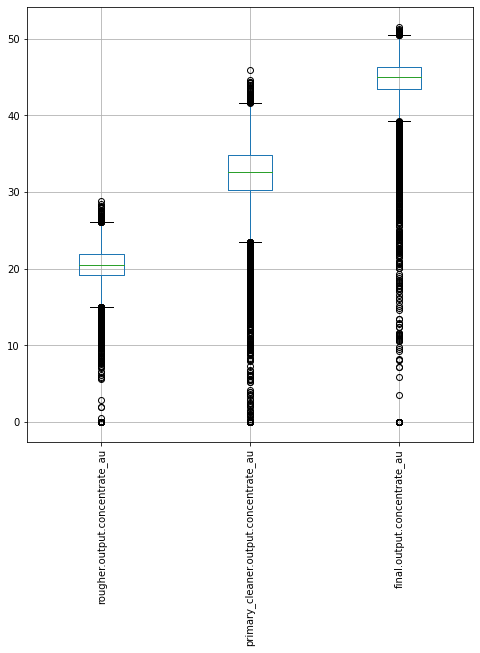

In [36]:
gold_recovery_full.boxplot(column=['rougher.output.concentrate_au', 
                                   'primary_cleaner.output.concentrate_au', 
                                   'final.output.concentrate_au'], figsize=(8,8), rot=90);

Распределение концентрации золота на разных этапах выглядит нормальным. Выбивается только группа значений около 0, если концентрация вещества равна 0, значит что-то не так. Взглянем подробнее на концетрацию по этапам, подсчитаем количество встречаемых значений.

In [37]:
col = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

In [38]:
for i in col:
    print(gold_recovery_full[i].value_counts().head(10))
    print()

0.000000     301
18.652372      6
0.010000       5
17.099216      4
20.341888      2
20.386141      2
17.408802      1
20.166857      1
23.282914      1
20.261423      1
Name: rougher.output.concentrate_au, dtype: int64

0.000000     78
0.010000     56
30.350809     6
36.306431     5
27.765463     5
32.168625     2
31.561684     1
32.516785     1
31.420075     1
33.490515     1
Name: primary_cleaner.output.concentrate_au, dtype: int64

0.000000     41
46.105030     6
45.270618     5
42.527939     5
44.427296     2
43.628570     1
46.800228     1
45.007569     1
46.886498     1
45.166596     1
Name: final.output.concentrate_au, dtype: int64



Мы видим значения, которые повторяются. Особенно много значений равных 0 во всех трёх случаях, а также более 50 значений 0.01 после первичной обработки. Эти значения кажутся подозрительными, если концентрация 0, то вещества попросту отсутствуют. Поэтому мы удалим все значения меньше 0.01, чтобы избавиться от этих артефактов.

In [39]:
gold_recovery_full.shape

(16094, 87)

In [40]:
gold_recovery_full = gold_recovery_full[(gold_recovery_full['rougher.output.concentrate_au'] > 0.01) &
                                        (gold_recovery_full['primary_cleaner.output.concentrate_au'] > 0.01) &
                                        (gold_recovery_full['final.output.concentrate_au'] > 0.01)
                                        ]

In [41]:
gold_recovery_full.shape

(15618, 87)

Как видим, размер таблицы уменьшился ещё почти на 480 строк.

Поскольку мы удалили часть объектов полной таблице, нам нужно синхронизировать с нашей таблицей обучающую и тестовую выборки. Зададим новые индексы нашим датафреймам, возьмём их их столбца *data*, и оставим в разделённых выборках только те объекты, которые есть в полной.

In [42]:
gold_recovery_full = gold_recovery_full.set_index('date')
gold_recovery_train = gold_recovery_train.set_index('date')
gold_recovery_test = gold_recovery_test.set_index('date')

Выведем размер таблиц до преобразования, чтобы потом сравнить.

In [43]:
gold_recovery_train.shape

(11017, 87)

In [44]:
gold_recovery_test.shape

(5383, 52)

Выберем объекты соответствующие обектам из полного датасета.

In [45]:
gold_recovery_train = gold_recovery_train.loc[gold_recovery_train.index.isin(gold_recovery_full.index)]
gold_recovery_test = gold_recovery_test.loc[gold_recovery_test.index.isin(gold_recovery_full.index)]

Выведем размер полученных таблиц.

In [46]:
gold_recovery_train.shape, gold_recovery_test.shape

((10676, 87), (4942, 52))

И для достоверности посчитаем сумму строк в обеих таблицах.

In [47]:
gold_recovery_train.shape[0]+gold_recovery_test.shape[0]

15618

Объём полной выборки равен сумме обучающей и тестовой.

In [48]:
gold_recovery_train = gold_recovery_train.reset_index(drop=False)

In [49]:
gold_recovery_full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


## Вывод

* Мы посмотрели как меняется концентрация металлов на каждом из этапов. После каждого из этапов очистки концентрация золота постепенно растёт с 20% до 40%. Доля серебра падает с 12% до 5%, а вот свинец наоборот растёт с 7.5% до 10%.
* Мы сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Средние значения размеров сырья на обучающей и тестовой выборках почти не различаются. Больше всего гранул на обучающей выборке имеет размер 50-60, их почти 7 тысяч, а на тестовой больше всего гранул размером 40-50, их в два раза меньше - почти 3.5 тысячи. Это может повлиять на точность предсказаний модели.
* В суммарной концентрации всех веществ на разных стадиях выявились аномальные значения. На каждом из этапов данных было много околонулевых значений, которых не должно быть. Мы избавились от строк, где встречаются значения меньше 0.01 концентрации, на всех выборках: полной, обучающей и тестовой.

# Модель

 Перед тем как подобрать оптимальную модель для предсказаний напишем функцию для вычисления итоговой sMAPE.

In [50]:
def smape(target, predicted):
    # подсчитаем sMAPE для rougher
    smape_rougher = ((abs(np.array(target)[:,0] - predicted[:,0])/((abs(np.array(target)[:,0])+
                                                                    abs(predicted[:,0]))/2))*100).mean()
    # подсчитаем sMAPE финальное 
    smape_final = ((abs(np.array(target)[:,1] - predicted[:,1])/((abs(np.array(target)[:,1])+
                                                                  abs(predicted[:,1]))/2))*100).mean()
    # подсчитаем sMAPE итоговое
    final_smape = smape_rougher*0.25 + smape_final*0.75
    return final_smape

Вызывая эту функцию мы будем подсчитывать итоговое симметричное среднее абсолютное процентное отклонение.

Теперь подготовим данные для моделй. В первую очередь разделим нашу обучающую выборку на *features* и *target*, в котором два целевых признака *rougher.output.recovery* и *final.output.recovery*.

In [51]:
features = gold_recovery_train[gold_recovery_test.columns]
target = gold_recovery_train[['rougher.output.recovery', 'final.output.recovery']]

Теперь применим масштабирование к нашим данным, чтобы наша будущая модель обучилась корректно.

In [52]:
numeric = gold_recovery_test.columns
scaler = StandardScaler()
scaler.fit(features[numeric])

StandardScaler()

In [53]:
features[numeric] = scaler.transform(features[numeric])
gold_recovery_test[numeric] = scaler.transform(gold_recovery_test[numeric])

Теперь приступим к обучению моделей. Начнём с *линейной регрессии*. Мы обучим модель на обучающей выборке и предскажем целевой признак на ней же.

In [54]:
model_lr = LinearRegression()
model_lr.fit(features, target)
predicted_lr = model_lr.predict(features)

Затем воспользуемся *make_scorer*, чтобы использовать нашу функцию **smape** в качестве метрики качества модели.

In [55]:
smape_score = make_scorer(smape, greater_is_better=False)

С помощью кросс-валидации, куда добавим функцию **smape**, посчитаем качество наше модели *линейной регрессии*.

In [56]:
final_score = cross_val_score(model_lr, features, target, cv=5, scoring=smape_score).mean()
final_score

-8.410771858266768

**smape** нашей функции получилась равна 8.411. Пока сравнивать не с чем. 

Теперь построим модель **DecisionTreeRegressor**. Для подбора гиперпараметров воспользуемся **GridSearchCV**. Для начала определим нашу модель без параметров.

In [57]:
model_dtr = DecisionTreeRegressor(random_state=42)

Теперь запишем параметры, которые мы будем подбирать для модели.

In [58]:
parametrs_dtr = { 'max_depth': range (1,10),
                  'min_samples_leaf': range (1,5),
                  'min_samples_split': range (2,5) }

Подготовим сетку, када в качества аргументов занесём нашу модель, её параметры и нашу метрику качества **smape** и запустим подбор параметров.

In [59]:
grid_dtr = GridSearchCV(model_dtr, parametrs_dtr, cv=5, scoring=smape_score, verbose=10)

In [60]:
%%time

grid_dtr.fit(features, target)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-7.685, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-8.023, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-5.515, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-8.085, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=-9.493, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=-7.685, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=-8.023, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=-5.515, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=-8.085, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=-9.493, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, score=-7.685, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, score=-8.023, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, score=-5.515, total=   0.0s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4 ............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, score=-8.085, total=   0.1s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=4, score=-9.493, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-7.685, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-8.023, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-5.515, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-8.085, total=   0.1s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_sam

[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, score=-6.107, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, score=-8.665, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=3, score=-8.612, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, score=-7.765, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, score=-8.532, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=4, score=-6.107, total=   0.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=2, min_samples_leaf=1, min_sam

[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-10.902, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-8.167, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-6.617, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-8.642, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=2, score=-8.649, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=1, min_samples_split=3, score=-10.902, total=   0.1s
[CV] max_depth=3, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=1, min_s

[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, score=-6.617, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, score=-8.642, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=3 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=3, score=-8.649, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, score=-10.902, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, score=-8.167, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=4, min_samples_split=4, score=-6.617, total=   0.1s
[CV] max_depth=3, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=3, min_samples_leaf=4, min_sa

[CV]  max_depth=4, min_samples_leaf=3, min_samples_split=4, score=-8.226, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, score=-10.198, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, score=-9.291, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, score=-6.635, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, score=-8.598, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, score=-8.226, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=3 ............
[CV]  max_depth=4, min_samples_leaf=4, min_sa

[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, score=-9.692, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, score=-6.996, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, score=-8.667, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=3 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=3, score=-8.773, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, score=-10.161, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_samples_split=4, score=-9.692, total=   0.2s
[CV] max_depth=5, min_samples_leaf=3, min_samples_split=4 ............
[CV]  max_depth=5, min_samples_leaf=3, min_sa

[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, score=-8.856, total=   0.2s
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, score=-9.037, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, score=-11.220, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, score=-9.411, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, score=-7.076, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=3, min_samples_split=2, score=-8.841, total=   0.2s
[CV] max_depth=6, min_samples_leaf=3, min_samples_split=2 ............
[CV]  max_depth=6, min_samples_leaf=3, min_sa

[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, score=-11.546, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, score=-11.119, total=   0.3s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, score=-7.294, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, score=-8.803, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=3 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=3, score=-8.936, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=2, min_samples_split=4, score=-11.546, total=   0.2s
[CV] max_depth=7, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=7, min_samples_leaf=2, min_

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=4, score=-8.051, total=   0.4s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=4, score=-9.292, total=   0.3s
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=4, score=-9.061, total=   0.3s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, score=-15.258, total=   0.3s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, score=-11.712, total=   0.3s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, score=-7.675, total=   0.3s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=8, min_samples_leaf=2, min_s

[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=2, score=-11.392, total=   0.3s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, score=-16.327, total=   0.3s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, score=-11.837, total=   0.3s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, score=-8.566, total=   0.3s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, score=-9.759, total=   0.3s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=9, min_samples_leaf=1, min_samples_split=3, score=-11.338, total=   0.3s
[CV] max_depth=9, min_samples_leaf=1, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=1, min

[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, score=-11.646, total=   0.3s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, score=-7.207, total=   0.3s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, score=-10.125, total=   0.3s
[CV] max_depth=9, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=9, min_samples_leaf=4, min_samples_split=4, score=-11.303, total=   0.3s
Wall time: 1min 36s


[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5)},
             scoring=make_scorer(smape, greater_is_better=False), verbose=10)

In [61]:
grid_dtr.best_score_

-7.760008234128352

Лучший результат, который выдала наша модель дерева решений 7.76.

In [62]:
grid_dtr.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}

Парметры нашей модели.

Подсчитаем теперь **smape** для модели случайного леса.

In [63]:
model_rfr = RandomForestRegressor(random_state=42)

In [64]:
parametrs_rfr = { 'max_depth': range(1, 10, 2),
                  'min_samples_leaf': range(1, 3),
                  'n_estimators': range(2, 20, 2) }

In [65]:
grid_rfr = GridSearchCV(model_rfr, parametrs_rfr, cv=5, scoring=smape_score, verbose=100)

In [66]:
%%time

grid_rfr.fit(features, target)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=1, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=2, score=-7.669, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=2, score=-8.027, total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=2, score=-5.492, total=   0.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=2, score=-8.075, total=   0.1s
[

[CV]  max_depth=1, min_samples_leaf=1, n_estimators=16, score=-7.672, total=   0.4s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    7.4s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=16, score=-8.014, total=   0.4s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    7.8s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=16, score=-5.496, total=   0.4s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    8.2s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=16, score=-7.977, total=   0.4s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    8.6s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=1, min_samples_leaf=1, n_estimators=16, scor

[CV]  max_depth=1, min_samples_leaf=2, n_estimators=12, score=-7.673, total=   0.3s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:   15.3s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=1, min_samples_leaf=2, n_estimators=12, score=-8.015, total=   0.3s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   15.6s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=1, min_samples_leaf=2, n_estimators=12, score=-5.494, total=   0.3s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   15.9s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=1, min_samples_leaf=2, n_estimators=12, score=-7.974, total=   0.3s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   16.2s remaining:    0.0s
[CV] max_depth=1, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=1, min_samples_leaf=2, n_estimators=12, scor

[CV]  max_depth=3, min_samples_leaf=1, n_estimators=8, score=-8.471, total=   0.5s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=10, score=-8.845, total=   0.7s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=10, score=-7.963, total=   0.7s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=10, score=-6.030, total=   0.7s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=10, score=-8.278, total=   0.7s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=10, score=-8.482, total=   0.7s
[CV] max_depth=3, min_samples_leaf=1, n_estimators=12 ................
[CV]  max_depth=3, min_samples_leaf=1, n_estimators=12, score=-8.817, t

[CV]  max_depth=3, min_samples_leaf=2, n_estimators=12, score=-5.942, total=   0.8s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=12, score=-8.250, total=   0.8s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=12, score=-8.453, total=   0.8s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=14 ................
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=14, score=-8.654, total=   0.9s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=14 ................
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=14, score=-7.934, total=   0.9s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=14 ................
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=14, score=-6.021, total=   0.9s
[CV] max_depth=3, min_samples_leaf=2, n_estimators=14 ................
[CV]  max_depth=3, min_samples_leaf=2, n_estimators=14, score=-8.274, 

[CV]  max_depth=5, min_samples_leaf=1, n_estimators=16, score=-8.258, total=   1.6s
[CV] max_depth=5, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=5, min_samples_leaf=1, n_estimators=16, score=-8.993, total=   1.6s
[CV] max_depth=5, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=5, min_samples_leaf=1, n_estimators=16, score=-6.199, total=   1.6s
[CV] max_depth=5, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=5, min_samples_leaf=1, n_estimators=16, score=-8.098, total=   1.6s
[CV] max_depth=5, min_samples_leaf=1, n_estimators=16 ................
[CV]  max_depth=5, min_samples_leaf=1, n_estimators=16, score=-10.073, total=   1.6s
[CV] max_depth=5, min_samples_leaf=1, n_estimators=18 ................
[CV]  max_depth=5, min_samples_leaf=1, n_estimators=18, score=-8.268, total=   1.8s
[CV] max_depth=5, min_samples_leaf=1, n_estimators=18 ................
[CV]  max_depth=5, min_samples_leaf=1, n_estimators=18, score=-8.809,

[CV]  max_depth=5, min_samples_leaf=2, n_estimators=18, score=-8.096, total=   1.8s
[CV] max_depth=5, min_samples_leaf=2, n_estimators=18 ................
[CV]  max_depth=5, min_samples_leaf=2, n_estimators=18, score=-10.122, total=   1.8s
[CV] max_depth=7, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=7, min_samples_leaf=1, n_estimators=2, score=-11.715, total=   0.3s
[CV] max_depth=7, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=7, min_samples_leaf=1, n_estimators=2, score=-11.386, total=   0.3s
[CV] max_depth=7, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=7, min_samples_leaf=1, n_estimators=2, score=-7.971, total=   0.3s
[CV] max_depth=7, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=7, min_samples_leaf=1, n_estimators=2, score=-9.335, total=   0.3s
[CV] max_depth=7, min_samples_leaf=1, n_estimators=2 .................
[CV]  max_depth=7, min_samples_leaf=1, n_estimators=2, score=-9.332, to

[CV]  max_depth=7, min_samples_leaf=2, n_estimators=4, score=-10.116, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, n_estimators=4 .................
[CV]  max_depth=7, min_samples_leaf=2, n_estimators=4, score=-7.573, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, n_estimators=4 .................
[CV]  max_depth=7, min_samples_leaf=2, n_estimators=4, score=-8.800, total=   0.5s
[CV] max_depth=7, min_samples_leaf=2, n_estimators=4 .................
[CV]  max_depth=7, min_samples_leaf=2, n_estimators=4, score=-9.826, total=   0.6s
[CV] max_depth=7, min_samples_leaf=2, n_estimators=6 .................
[CV]  max_depth=7, min_samples_leaf=2, n_estimators=6, score=-8.813, total=   0.8s
[CV] max_depth=7, min_samples_leaf=2, n_estimators=6 .................
[CV]  max_depth=7, min_samples_leaf=2, n_estimators=6, score=-8.807, total=   0.8s
[CV] max_depth=7, min_samples_leaf=2, n_estimators=6 .................
[CV]  max_depth=7, min_samples_leaf=2, n_estimators=6, score=-7.865, total=

[CV]  max_depth=9, min_samples_leaf=1, n_estimators=6, score=-9.358, total=   1.0s
[CV] max_depth=9, min_samples_leaf=1, n_estimators=8 .................
[CV]  max_depth=9, min_samples_leaf=1, n_estimators=8, score=-8.524, total=   1.3s
[CV] max_depth=9, min_samples_leaf=1, n_estimators=8 .................
[CV]  max_depth=9, min_samples_leaf=1, n_estimators=8, score=-9.218, total=   1.4s
[CV] max_depth=9, min_samples_leaf=1, n_estimators=8 .................
[CV]  max_depth=9, min_samples_leaf=1, n_estimators=8, score=-7.053, total=   1.3s
[CV] max_depth=9, min_samples_leaf=1, n_estimators=8 .................
[CV]  max_depth=9, min_samples_leaf=1, n_estimators=8, score=-8.921, total=   1.3s
[CV] max_depth=9, min_samples_leaf=1, n_estimators=8 .................
[CV]  max_depth=9, min_samples_leaf=1, n_estimators=8, score=-9.272, total=   1.3s
[CV] max_depth=9, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=9, min_samples_leaf=1, n_estimators=10, score=-8.328, total=

[CV]  max_depth=9, min_samples_leaf=2, n_estimators=10, score=-7.316, total=   1.8s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=10 ................
[CV]  max_depth=9, min_samples_leaf=2, n_estimators=10, score=-8.699, total=   1.7s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=10 ................
[CV]  max_depth=9, min_samples_leaf=2, n_estimators=10, score=-9.579, total=   1.8s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=9, min_samples_leaf=2, n_estimators=12, score=-8.545, total=   2.4s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=9, min_samples_leaf=2, n_estimators=12, score=-8.991, total=   2.4s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=9, min_samples_leaf=2, n_estimators=12, score=-7.073, total=   2.4s
[CV] max_depth=9, min_samples_leaf=2, n_estimators=12 ................
[CV]  max_depth=9, min_samples_leaf=2, n_estimators=12, score=-8.614, 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 3),
                         'n_estimators': range(2, 20, 2)},
             scoring=make_scorer(smape, greater_is_better=False), verbose=100)

In [67]:
grid_rfr.best_score_

-7.723776938186679

In [68]:
grid_rfr.best_params_

{'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 14}

In [69]:
grid_rfr.best_estimator_

RandomForestRegressor(max_depth=1, n_estimators=14, random_state=42)

Лучшая модель *RandomForestRegressor* выдала результат 7.724.

Для сравнения наших моделей создадим предсказания константной модели, признаки в которой заполним медианой.

In [70]:
pred_constant_rougher = pd.Series(target['rougher.output.recovery'].median(), index=target.index)
pred_constant_final = pd.Series(target['final.output.recovery'].median(), index=target.index)

In [71]:
pred_constant = np.array(pd.concat([pred_constant_rougher,pred_constant_final],axis=1))

Теперь подсчитаем **smape** для константной модели.

In [72]:
smape_const = smape(target, pred_constant)
smape_const

8.44039325487087

Константная модель выдала результат равный 8.44.

Сравним нашу основную метрику, полученную от разных моделей и выберем лучшую.

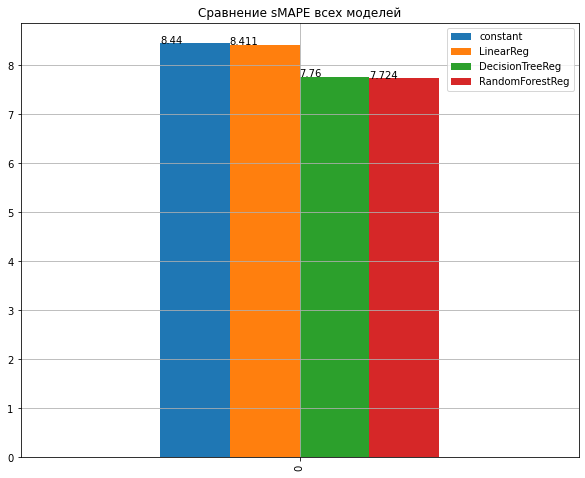

In [73]:
smape_all = pd.DataFrame({'constant': [smape_const],
                          'LinearReg': [final_score*(-1)],
                          'DecisionTreeReg': [grid_dtr.best_score_*(-1)],
                          'RandomForestReg': [grid_rfr.best_score_*(-1)]
                          })
ax = smape_all.plot(kind='bar', grid=True, figsize=(10,8), title='Сравнение sMAPE всех моделей');
for p in ax.patches:
    ax.annotate(str(p.get_height().round(3)), (p.get_x(), p.get_height()))

Лучшей моделью оказался *случайный лес*, который на 0.04 оказался лучше дерева решений. *RandomForestRegressor* мы и будем использовать для предсказания на тестовой выборке.

In [74]:
predicted_final = grid_rfr.best_estimator_.predict(gold_recovery_test)

Для подсчёта финального итогового **smape** тестовой выборки целевые признаки мы возьмём из полного датасета.

In [75]:
target_final = gold_recovery_full[['rougher.output.recovery', 
                                   'final.output.recovery']].query('index in @gold_recovery_test.index')

Подсчитаем итоговый **smape**.

In [76]:
smape(target_final, predicted_final)

6.947091798302635

Итоговая метрика равна 6.95. Это хороший результат для нашей модели.

## Выводы

* Мы написали функцию для подсчёта главной метрики нашего исследования **sMAPE**. С помощь этой функции мы будем определять насколько эффективны наши модели, предсказывающие целевой признак.
* Мы подготовили наш датасет для использования в моделях:
    * Разделили выборку на фичи и целевые признаки;
    * Масштабировали данные, чтобы модель обучилась корректнее;
    * С помощью *make_scorer* подготовили написанную ранее функцию в качестве оценки моделей.
* Применив кросс-валидацию, поиск по сетке (*GridSearchCV*), мы создали три модели: линейную регрессию, дерево решений и случайный лес. Подсчитав метрику **smape** мы сравнили наши модели с константной. Худший результат показала линейная регрессия, которая оказалась близка к константной модели, а лучшей - случайный лес, превзойдя дерево решений на 0.04.
* Выбрав лучшую модель, мы посчитали **smape** на тестовой выборке и получили результат 6.95.